## Image cell segmentation using Cellpose
[Cellpose website](https://www.cellpose.org/) <br>
[Github repo](https://github.com/mouseland/cellpose) <br>
[Original Notebook](https://nbviewer.org/github/MouseLand/cellpose/blob/master/notebooks/run_cellpose.ipynb)

In [ ]:
# Install required software
!pip install cellpose
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

In [ ]:
# Load libraries
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io

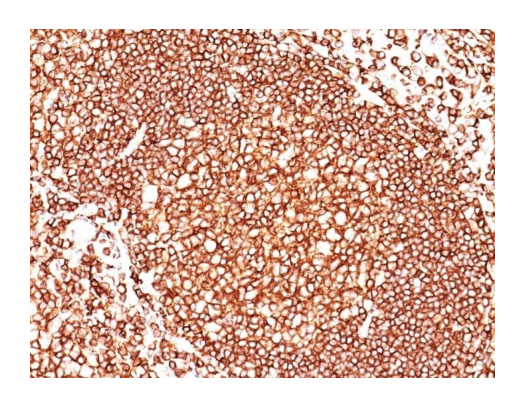

In [ ]:
files = ['/home/path_img2/tonsil_CD45.jpg']
img = io.imread(files[0])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from cellpose import models, io
from cellpose import plot

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=True, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

channels = [[0,0]]



# or in a loop
for chan, filename in zip(channels, files):
    img = io.imread(filename)
    masks, flows, styles, diams = model.eval(img, diameter=None, channels=chan)

    # save results so you can load in gui
    io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)

    # save results as png
    io.save_to_png(img, masks, flows, filename)

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.